# Exploring the Relationship Between Screen Time Patterns and Insomnia-Related Sleep Disturbances

In [1515]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

## Data Loading and Cleaning

In [1516]:
df = pd.read_csv('C:\\Users\\Blix\\Documents\\GitHub\\CCDATSCL_PROJECT\\merged_dataset.csv')

In [1517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             91 non-null     object
 1   Total Screen Time                91 non-null     int64 
 2   Total Number of Notifications    91 non-null     int64 
 3   Total Number of Unlocks          91 non-null     int64 
 4   Social Media Usage               91 non-null     int64 
 5   Video App Usage                  91 non-null     int64 
 6   Games Usage                      91 non-null     int64 
 7   0 to 6                           91 non-null     int64 
 8   6 to 12                          91 non-null     int64 
 9   12 to 18                         91 non-null     int64 
 10  18 to 24                         91 non-null     int64 
 11  Sleep Start (Time Previous Day)  91 non-null     int64 
 12  Sleep End (Time Waken)           91 no

In [1518]:
df.head()

,Date,Total Screen Time,Total Number of Notifications,Total Number of Unlocks,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),Sleep End (Time Waken),Sleep Duration,Sleep Quality,Steps
0,10/27/2025,578,545,108,208,285,42,148,75,192,163,3,10,7,3,5810
1,10/28/2025,816,521,78,259,553,0,154,30,292,340,3,10,7,3,1185
2,10/29/2025,952,440,55,152,598,202,115,243,294,300,2,11,9,3,463
3,10/30/2025,672,471,56,163,332,177,45,283,209,135,1,5,4,2,9111
4,10/31/2025,703,308,60,121,476,106,0,225,247,231,24,6,6,3,4024


In [1519]:
df.describe()

,Total Screen Time,Total Number of Notifications,Total Number of Unlocks,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),Sleep End (Time Waken),Sleep Duration,Sleep Quality,Steps
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,555.241758,420.318681,78.879121,143.516484,320.483516,58.208791,65.175824,123.604396,187.021978,179.439560,9.065934,7.989011,6.549451,2.769231,6176.098901
std,173.038874,89.966522,26.782596,51.020772,141.790406,73.050594,74.376608,66.751925,86.382737,85.785418,9.832827,1.669960,2.212408,0.919866,3717.266224
min,162.000000,254.000000,19.000000,32.000000,57.000000,0.000000,0.000000,0.000000,44.000000,0.000000,1.000000,4.000000,1.000000,1.000000,36.000000
25%,435.000000,349.000000,56.500000,107.500000,211.000000,4.500000,0.000000,75.000000,121.500000,126.000000,2.000000,7.000000,5.000000,2.000000,3045.500000
50%,563.000000,410.000000,78.000000,135.000000,307.000000,27.000000,44.000000,120.000000,177.000000,173.000000,3.000000,8.000000,6.000000,3.000000,5832.000000
75%,661.000000,479.000000,93.500000,174.500000,416.500000,97.000000,104.500000,165.000000,247.000000,246.000000,23.000000,9.000000,8.000000,3.000000,9347.500000
max,1032.000000,673.000000,158.000000,274.000000,847.000000,311.000000,329.000000,312.000000,360.000000,360.000000,24.000000,12.000000,12.000000,4.000000,16342.000000


In [1520]:
# Check first and last date in the dataset in terms of Timestamp
df['Date'] = pd.to_datetime(df['Date'])
print("First date in dataset:", df['Date'].min())
print("Last date in dataset:", df['Date'].max())

First date in dataset: 2025-10-27 00:00:00
Last date in dataset: 2026-01-25 00:00:00


In [1521]:
df.isna().sum()

Date                               0
Total Screen Time                  0
Total Number of Notifications      0
Total Number of Unlocks            0
Social Media Usage                 0
Video App Usage                    0
Games Usage                        0
0 to 6                             0
6 to 12                            0
12 to 18                           0
18 to 24                           0
Sleep Start (Time Previous Day)    0
Sleep End (Time Waken)             0
Sleep Duration                     0
Sleep Quality                      0
Steps                              0
dtype: int64

In [1522]:
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [1523]:
# Create a feature for the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

In [1524]:
# Create steps intensity feature. Sedentary: < 5000, Active >= 5000 and <= 10000, Very Active > 10000
def categorize_steps(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 7000 <= steps <= 10000:
        return 'Active'
    else:
        return 'Very Active'

df['StepsIntensity'] = df['Steps'].apply(categorize_steps)

In [1525]:
'''
Create a feature for sleep onset minutes from midnight. Sleep Start is recorded as the hour (0-24). 
If Sleep Start ranges from 0 to 6, we will assume the person went to sleep after midnight and calculate minutes from midnight and is a positive value. 
If Sleep Start ranges from 20 to 24, we will assume the person went to sleep before midnight and calculate minutes from midnight accordingly and is a negative value. 
''' 
def calculate_sleep_onset_minutes_since_midnight(sleep_start):
    if 0 <= sleep_start <= 12:
        return sleep_start * 60
    elif 12 < sleep_start <= 24:
        return (sleep_start - 24) * 60
    else:
        return np.nan  # Invalid value

df['SleepOnsetMinutes'] = df['Sleep Start (Time Previous Day)'].apply(calculate_sleep_onset_minutes_since_midnight)
# Create a binary feature to determine if the person slept before or after midnight
df['SleptAfterMidnight'] = df['Sleep Start (Time Previous Day)'].apply(lambda x: 1 if 0 <= x <= 12 else 0)
# Convert Sleep Duration from hours to minutes
df['SleepDurationMinutes'] = df['Sleep Duration'] * 60

In [1526]:
# Create a feature that stores the 0 to 6 screen time for tomorrow
df['Previous_Sleep_18_24_ScreenTime'] = df['18 to 24'].shift(1)
df['Pre_Sleep_0_6_ScreenTime'] = df['0 to 6'].shift(-1)

In [1527]:
df['Effective Evening Screen Time'] = df['18 to 24'] + df['Pre_Sleep_0_6_ScreenTime']
df['Daytime Screen Time'] = df['6 to 12'] + df['12 to 18']

In [1528]:
def presleep_window(row):
    start = row['Sleep Start (Time Previous Day)']
    
    if start <= 24 and start >= 20:
        # Percentage of the 18-24 block that falls in the 3 hours before sleep
        # Max of 3 hours, but limited by how much of the 18-24 block is used
        return 0.5 * row['Previous_Sleep_18_24_ScreenTime']
    # Case 3: Sleep from 0 to 3 AM
    elif start <= 3:
        return row['0 to 6'] + (0.5 * row['Previous_Sleep_18_24_ScreenTime'])
    else: # Capture the 0-6 of the next day if sleep start is between 3 and 6
        return row['0 to 6']

df['Estimated_PreSleep_3hr'] = df.apply(presleep_window, axis=1)

In [1529]:
# Create target feature for sleep quality by shifting Sleep Quality by -1 day
df['SleepQualityNextDay'] = df['Sleep Quality'].shift(-1)
df['SleepDurationNextDay'] = df['SleepDurationMinutes'].shift(-1)

In [1530]:
# Create a feature for Interactive Screen Time by summing up Gaming and Social Media Screen Time
df['InteractiveScreenTime'] = df['Games Usage'] + df['Social Media Usage']
df['NonInteractiveScreenTime'] = df['Video App Usage']

In [1531]:
# Drop Total Number of Notifications and Total Number of Unlocks, as they may not be relevant to the analysis
df.drop(columns=['Total Number of Notifications', 'Total Number of Unlocks'], inplace=True)
df.drop(columns=['0 to 6', '6 to 12', '12 to 18', '18 to 24'], inplace=True)
df.drop(columns=['Social Media Usage', 'Games Usage', 'Video App Usage'], inplace=True)

In [1532]:
# Create Feature for High and Low Evening Screen Time. Low is <120 mins, High is >=120 mins
df['Evening Screen Time Category'] = df['Estimated_PreSleep_3hr'].apply(lambda x: 'Low' if x <= 120 else 'High')

In [1533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             91 non-null     datetime64[ns]
 1   Total Screen Time                91 non-null     int64         
 2   Sleep Start (Time Previous Day)  91 non-null     int64         
 3   Sleep End (Time Waken)           91 non-null     int64         
 4   Sleep Duration                   91 non-null     int64         
 5   Sleep Quality                    91 non-null     int64         
 6   Steps                            91 non-null     int64         
 7   DayOfWeek                        91 non-null     object        
 8   StepsIntensity                   91 non-null     object        
 9   SleepOnsetMinutes                91 non-null     int64         
 10  SleptAfterMidnight               91 non-null     int64         


## Exploratory Data Analysis

Spearman's Rank Correlation: 0.0627, p-value: 0.5570


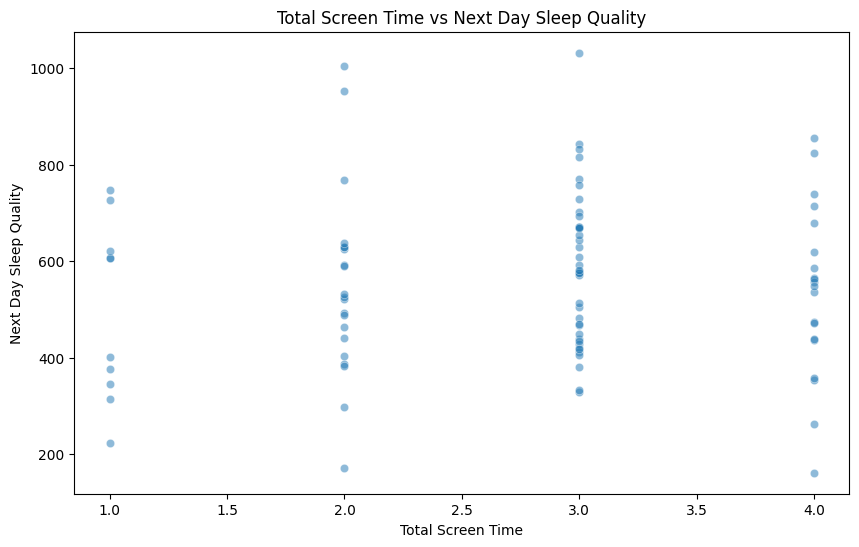

In [1534]:
# Print Spearman's Rank Correlation between Total Screen Time and Target_Sleep_Quality
spearman_corr, p_value = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation: {spearman_corr:.4f}, p-value: {p_value:.4f}")
# Jitter Scatter Plot with for Total Screen Time and Target_Sleep_Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Total Screen Time', x='SleepQualityNextDay', data=df, alpha=0.5)
plt.title('Total Screen Time vs Next Day Sleep Quality')
plt.xlabel('Total Screen Time')
plt.ylabel('Next Day Sleep Quality')
plt.show()

Spearman's Rank Correlation: 0.0420, p-value: 0.6944


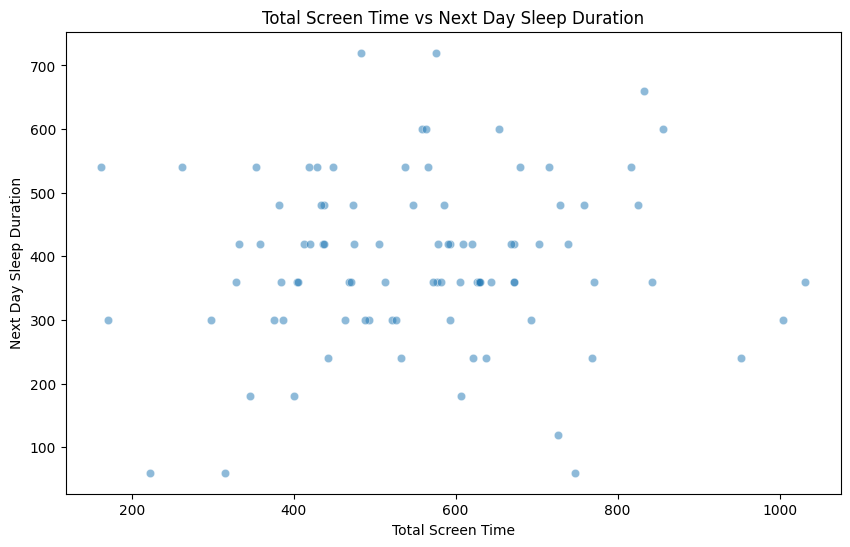

In [1535]:
# Print Spearman's Rank Correlation between Total Screen Time and Target_Sleep_Duration
spearman_corr, p_value = stats.spearmanr(df['Total Screen Time'], df['SleepDurationNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation: {spearman_corr:.4f}, p-value: {p_value:.4f}")
# Jitter Scatter Plot with for Total Screen Time and Target_Sleep_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Screen Time', y='SleepDurationNextDay', data=df, alpha=0.5)
plt.title('Total Screen Time vs Next Day Sleep Duration')
plt.xlabel('Total Screen Time')
plt.ylabel('Next Day Sleep Duration')
plt.show()

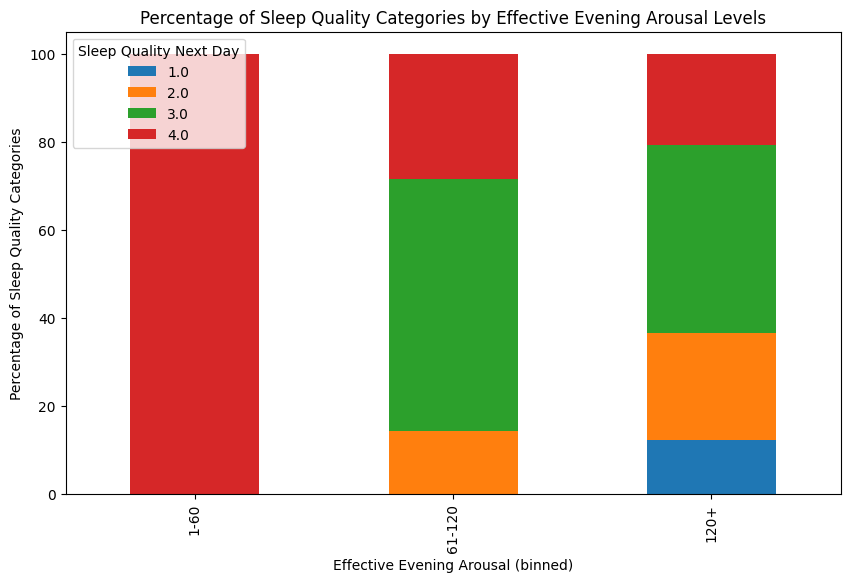

In [1536]:
# Stacked Bar Chart for Showing the Percentage of Sleep Quality Categories for Different Levels of Effective Evening Screen Time
# Create bins for Effective Evening Screen Time
df['Effective Evening Screen Time Bin'] = pd.cut(df['Effective Evening Screen Time'], bins=[-1, 0, 60, 120, np.inf], labels=['0', '1-60', '61-120', '120+'])
# Create a crosstab of Sleep Quality categories by Evening Screen Time bins
crosstab = pd.crosstab(df['Effective Evening Screen Time Bin'], df['SleepQualityNextDay'], normalize='index') * 100
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Sleep Quality Categories by Effective Evening Arousal Levels')
plt.xlabel('Effective Evening Arousal (binned)')
plt.ylabel('Percentage of Sleep Quality Categories')
plt.legend(title='Sleep Quality Next Day')
plt.show()

In [1537]:
# Check number of values for each bin of Effective Evening Screen Time
print(df['Effective Evening Screen Time Bin'].value_counts())

Effective Evening Screen Time Bin
120+      82
61-120     7
1-60       1
0          0
Name: count, dtype: int64


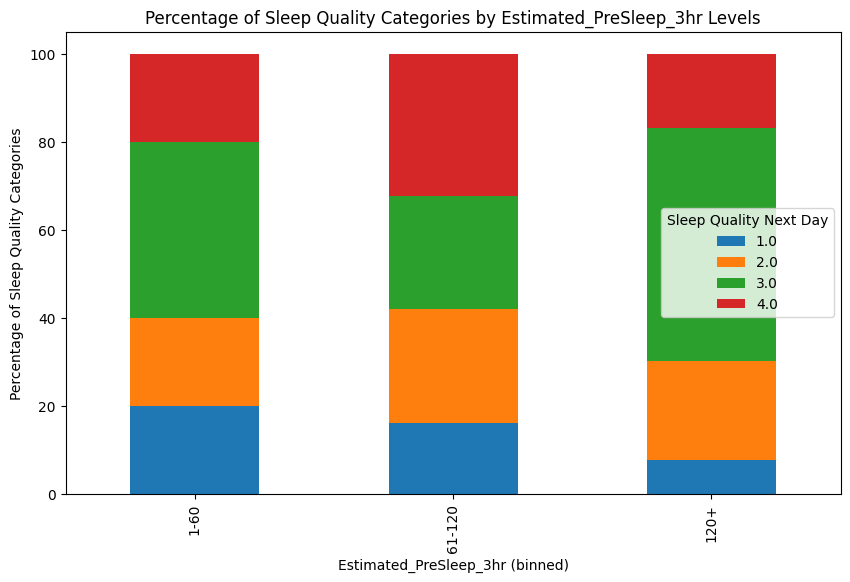

In [1538]:
# Stacked Bar Chart for Showing the Percentage of Sleep Quality Categories for Different Levels of Estimated_PreSleep_3hr
# Create bins for Estimated_PreSleep_3hr
df['Pre Sleep Bin'] = pd.cut(df['Estimated_PreSleep_3hr'], bins=[-1, 0, 60, 120, np.inf], labels=['0', '1-60', '61-120', '120+'])
# Create a crosstab of Sleep Quality categories by Evening Screen Time bins
crosstab = pd.crosstab(df['Pre Sleep Bin'], df['SleepQualityNextDay'], normalize='index') * 100
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Sleep Quality Categories by Estimated_PreSleep_3hr Levels')
plt.xlabel('Estimated_PreSleep_3hr (binned)')
plt.ylabel('Percentage of Sleep Quality Categories')
plt.legend(title='Sleep Quality Next Day')
plt.show()

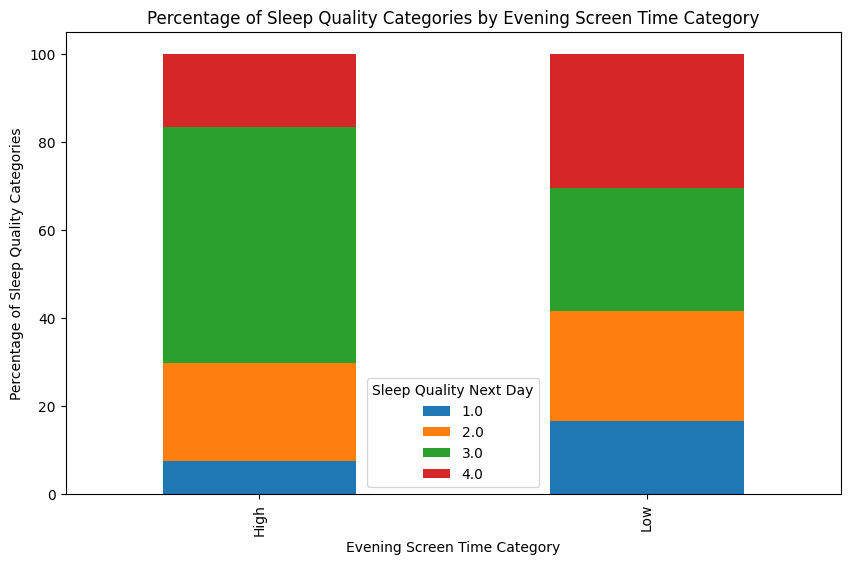

In [1539]:
# Stacked Bar Chart for Showing the Proportion of Sleep Quality Categories for Different Levels of Evening Screen Time Category
crosstab = pd.crosstab(df['Evening Screen Time Category'], df['SleepQualityNextDay'], normalize='index') * 100
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Sleep Quality Categories by Evening Screen Time Category')
plt.xlabel('Evening Screen Time Category')
plt.ylabel('Percentage of Sleep Quality Categories')
plt.legend(title='Sleep Quality Next Day')
plt.show()

In [1540]:
# Check Counts of Sleep Start for High and Low Evening Screen Time Category
print(df.groupby('Evening Screen Time Category')['Sleep Start (Time Previous Day)'].value_counts())

Evening Screen Time Category  Sleep Start (Time Previous Day)
High                          2                                  21
                              1                                   8
                              3                                   8
                              5                                   5
                              24                                  5
                              23                                  3
                              4                                   2
                              6                                   1
                              7                                   1
Low                           24                                 10
                              1                                   8
                              23                                  6
                              2                                   4
                              21                      

In [1541]:
# Perform a Standardized Ordered Logistic Regression to Compare Odds Ratios of Estimated_PreSleep_3hr vs Total Screen Time
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
# Drop rows with NaN in SleepQualityNextDay
df_clean = df.dropna(subset=['SleepQualityNextDay', 'Estimated_PreSleep_3hr', 'Total Screen Time'])
# Standardize the predictor variables
df_clean['Estimated_PreSleep_3hr_Std'] = (df_clean['Estimated_PreSleep_3hr'] - df_clean['Estimated_PreSleep_3hr'].mean()) / df_clean['Estimated_PreSleep_3hr'].std()
df_clean['Total_Screen_Time_Std'] = (df_clean['Total Screen Time'] - df_clean['Total Screen Time'].mean()) / df_clean['Total Screen Time'].std()
# Define the ordered logistic regression model
model = OrderedModel(df_clean['SleepQualityNextDay'],
                     df_clean[['Estimated_PreSleep_3hr_Std', 'Total_Screen_Time_Std']],
                     distr='logit')
# Fit the model
result = model.fit(method='bfgs')
print(result.summary())
# Calculate and print odds ratios
params = result.params
odds_ratios = np.exp(params)
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 1.282891
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
                              OrderedModel Results                             
Dep. Variable:     SleepQualityNextDay   Log-Likelihood:                -114.18
Model:                    OrderedModel   AIC:                             238.4
Method:             Maximum Likelihood   BIC:                             250.8
Date:                 Mon, 09 Feb 2026                                         
Time:                         04:39:21                                         
No. Observations:                   89                                         
Df Residuals:                       84                                         
Df Model:                            2                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

C:\Users\Blix\AppData\Local\Temp\ipykernel_32200\3784230295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Estimated_PreSleep_3hr_Std'] = (df_clean['Estimated_PreSleep_3hr'] - df_clean['Estimated_PreSleep_3hr'].mean()) / df_clean['Estimated_PreSleep_3hr'].std()
C:\Users\Blix\AppData\Local\Temp\ipykernel_32200\3784230295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total_Screen_Time_Std'] = (df_clean['Total Screen Time'] - df_clean['Total Screen Time'].mean()) / df_clean['Tota

In [1542]:
# Check number of values for each bin of Estimated_PreSleep_3hr
print(df['Pre Sleep Bin'].value_counts())

Pre Sleep Bin
120+      53
61-120    32
1-60       5
0          0
Name: count, dtype: int64


In [1543]:
# Check the number of sleep start time per Pre Sleep Bin
print(df.groupby('Pre Sleep Bin')['Sleep Start (Time Previous Day)'].value_counts())

Pre Sleep Bin  Sleep Start (Time Previous Day)
0              1                                   0
               2                                   0
               3                                   0
               4                                   0
               5                                   0
               6                                   0
               7                                   0
               21                                  0
               22                                  0
               23                                  0
               24                                  0
1-60           23                                  3
               24                                  2
               1                                   0
               2                                   0
               3                                   0
               4                                   0
               5                                   0

C:\Users\Blix\AppData\Local\Temp\ipykernel_32200\2787682802.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pre Sleep Bin')['Sleep Start (Time Previous Day)'].value_counts())


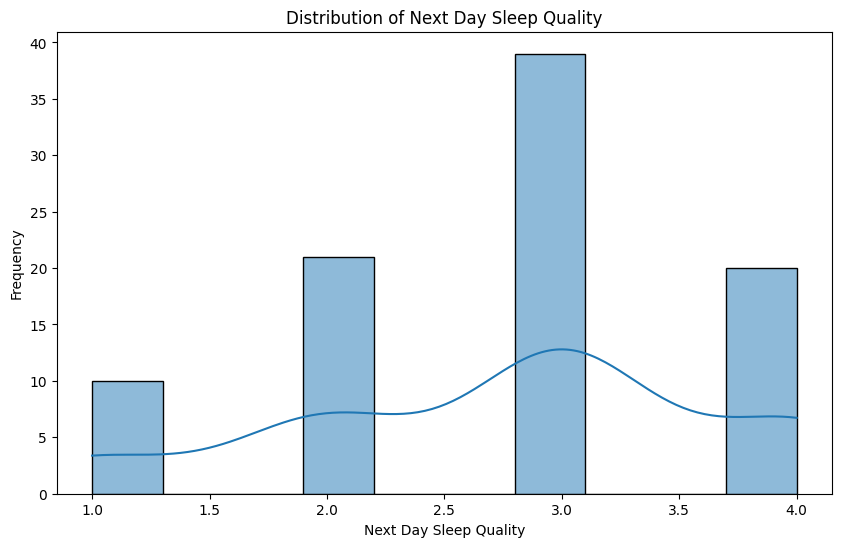

In [1544]:
# Plot distribution of Sleep Quality Next-Day
plt.figure(figsize=(10, 6))
sns.histplot(df['SleepQualityNextDay'].dropna(), bins=10, kde=True)
plt.title('Distribution of Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Frequency')
plt.show()



## Statistical Tests

In [1545]:
# Perform a Independent-Samples T-test for the following question:
# Is there a significant difference in self-reported sleep quality when exceeding the 120-minute pre-sleep screen time threshold?
# Ho: There is no statistically significant difference in the distribution of sleep quality scores between days characterized by high (>120 mins) and low (<=120 mins) evening screen time.
# Ha: Sleep quality scores are significantly higher on days characterized by low evening screen time compared to days with high evening screen time.
# Use Shapiro Wilk test to check normality of Sleep Quality Next-Day for all
low_screen_time = df[df['Evening Screen Time Category'] == 'Low']['SleepQualityNextDay'].dropna()
high_screen_time = df[df['Evening Screen Time Category'] == 'High']['SleepQualityNextDay'].dropna()
shapiro_low = stats.shapiro(low_screen_time)
shapiro_high = stats.shapiro(high_screen_time)
print(f"Shapiro-Wilk Test for Low Evening Screen Time: W={shapiro_low.statistic:.4f}, p-value={shapiro_low.pvalue:.4f}")
print(f"Shapiro-Wilk Test for High Evening Screen Time: W={shapiro_high.statistic:.4f}, p-value={shapiro_high.pvalue:.4f}")

# Since both p-values are less than 0.05, we reject the null hypothesis of normality.
# Therefore, we will use the non-parametric Mann-Whitney U test instead of the t-test.
mannwhitney_result = stats.mannwhitneyu(low_screen_time, high_screen_time, alternative='greater')
print(f"Mann-Whitney U Test: U={mannwhitney_result.statistic}, p-value={mannwhitney_result.pvalue:.4f}")

Shapiro-Wilk Test for Low Evening Screen Time: W=0.8589, p-value=0.0003
Shapiro-Wilk Test for High Evening Screen Time: W=0.8427, p-value=0.0000
Mann-Whitney U Test: U=951.5, p-value=0.5726


## Data Split

## Model Training

## Model Optimization

## Model Evaluation